In [370]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,sys,glob, h5py

from dlab import generalephys as ephys
from dlab.generalephys import placeAxesOnGrid, cleanAxes
from dlab import utils

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


imports

## load data

In [5]:
#load from raw data folders
data_path = '/Volumes/s1/bioelectrics'
dfs = [utils.df_from_phy(folder) for folder in glob.glob(data_path+'/*')]
df = pd.concat(dfs,ignore_index=True)


In [6]:
for e in df.mouse.unique():
    print('mouse: '+str(e)+'    # of units:'+str(df[df.mouse==e].shape[0]))

mouse: 3    # of units:58
mouse: 5    # of units:123
mouse: 6    # of units:162
mouse: 14    # of units:30
mouse: 15    # of units:142
mouse: 18    # of units:332
mouse: 7    # of units:128
mouse: 8    # of units:112
mouse: 9    # of units:52
mouse: 10    # of units:123
mouse: 20    # of units:246
mouse: 22    # of units:100


clean up some data formats from the saving

In [7]:
wave_ = []
for i,template in df.template.items():
    wave_.append(utils.get_peak_waveform_from_template(np.array(template)))
df.waveform=wave_

In [8]:
f_ = []
for i,times in df.times.items():
    try:
        rate = float(len(times)/(times[-1] - times[0]))
        if rate < 400:
            f_.append(rate)
        else:
            f_.append(0.)
    except:
        f_.append(0.)
df['overall_rate']=f_

typo in cohort name

In [ ]:
df.cohort[df.cohort=='NCPA']='NPCA'

per dailey:

In [16]:
df.cohort[df.mouse==9]='NPCD'
df.cohort[df.mouse==10]='NPCD'

### classify fast-spiking and regular-spiking

No handles with labels found to put in legend.
No handles with labels found to put in legend.


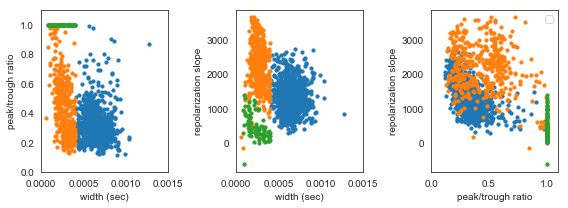

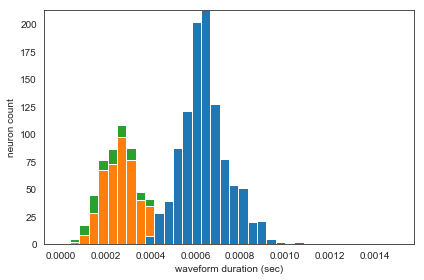

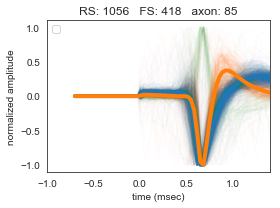

In [17]:
df = utils.classify_waveform_shape(df,plots=True,kmeans=0,
                                   basepath='/Users/administrator/Dropbox/cu/dailey_figs/')

# output to file

In [ ]:
df.to_json(os.path.join(data_path,'dailey_npix.json'))
df.to_csv(os.path.join(data_path,'dailey_npix.csv'))